### Business Case

Netflix has hired SCJ consulting to build a movie recommendation system to use for customers who first join the platform. The system asks users to rate five movies they have seen and returns five tailored movie recommendations. The system will use a collaborative filtering model to create the recommendations.

The data we will use to develop the recommendation system is sourced from:

- The movielens dataset
- IMDB datasets

Links can be found to the datasets in the Readme file. The data includes over 100,000 movie ratings from over 600 users and over 9000 movies.

### Data Cleaning

In [1]:
import pandas as pd
ratings = pd.read_csv('Data/ratings.csv')
movies = pd.read_csv('Data/movies.csv')
links = pd.read_csv('Data/links.csv')

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(9742, 3)

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.shape

(100836, 4)

In [6]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


We will join the movie, ratings, and links csv files into a combined dataframe so we can match movies to features from the IMDB datasets.

In [7]:
movies_ratings=ratings.join(movies.set_index('movieId'), on='movieId', how='left', lsuffix='r')

In [8]:
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
movies_ratings.shape

(100836, 6)

In [10]:
movies_ratings.isna().sum().sum()

0

In [11]:
movies_ratings_imdb=movies_ratings.join(links.set_index('movieId'), on='movieId', how='left', lsuffix='r')

In [12]:
movies_ratings_imdb.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0


In [13]:
movies_ratings_imdb.shape

(100836, 8)

We will now import the IMDB datasets that include movie features that will be used in the Exploratory Data Analysis (EDA) process as well as in the LightFM model.

In [14]:
basics = pd.read_csv('Data/title.basics.tsv.gz', compression='gzip', sep='\t')

C:\Users\swzoe\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [16]:
basics.shape

(7557513, 9)

In [17]:
crew = pd.read_csv('Data/title.crew.tsv.gz', compression='gzip', sep='\t')

In [18]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [19]:
crew.shape

(7557513, 3)

In [20]:
basics.rename(columns = {'tconst':'imdbId'}, inplace = True)
crew.rename(columns = {'tconst':'imdbId'}, inplace = True)

In [21]:
basics_crew=basics.join(crew.set_index('imdbId'), on='imdbId', how='inner', lsuffix='b')

In [24]:
basics_crew.head()

,imdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",nm0721526,\N
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",nm0721526,\N
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",nm0721526,\N
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",nm0005690,\N


In [25]:
basics_crew.imdbId=basics_crew.imdbId.map(lambda x: int(x.strip("tt")))

In [26]:
basics_crew.duplicated(subset='imdbId').sum()

0

we will now join the movielens and IMDB datasets into one dataframe based on the IMDB ID for each movie.

In [27]:
combined=movies_ratings_imdb.join(basics_crew.set_index('imdbId'), on='imdbId', how='left', lsuffix='b')

In [28]:
combined.head()

,userId,movieId,rating,timestamp,title,genresb,imdbId,tmdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",nm0005124,"nm0005124,nm0230032,nm0004056,nm0710020,nm0923..."
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,movie,Grumpier Old Men,Grumpier Old Men,0,1995,\N,101,"Comedy,Romance",nm0222043,nm0425756
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0,movie,Heat,Heat,0,1995,\N,170,"Crime,Drama,Thriller",nm0000520,nm0000520
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,movie,Se7en,Se7en,0,1995,\N,127,"Crime,Drama,Mystery",nm0000399,nm0001825
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,movie,The Usual Suspects,The Usual Suspects,0,1995,\N,106,"Crime,Mystery,Thriller",nm0001741,nm0003160


In [29]:
combined.shape

(100836, 18)

Creating a condensed dataframe with only the relevant movie, user, ratings, and feature information.

In [59]:
condensed=combined.drop(columns=['genres','writers','timestamp','imdbId','tmdbId','titleType','primaryTitle','originalTitle','isAdult','endYear'])

In [60]:
condensed.head()

,userId,movieId,rating,title,genresb,startYear,runtimeMinutes,directors
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,81,nm0005124
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,101,nm0222043
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995,170,nm0000520
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,127,nm0000399
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,106,nm0001741


In [61]:
condensed.dropna(inplace=True)

In [62]:
for column in condensed.columns:
     print("\n" + column)
     print(condensed[column].value_counts())


userId
414    2695
599    2475
474    2105
448    1861
274    1345
       ... 
595      20
569      20
431      20
442      20
576      19
Name: userId, Length: 610, dtype: int64

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
153386      1
57147       1
5986        1
100304      1
8196        1
Name: movieId, Length: 9707, dtype: int64

rating
4.0    26803
3.0    20035
5.0    13196
3.5    13125
4.5     8546
2.0     7545
2.5     5550
1.0     2809
1.5     1791
0.5     1365
Name: rating, dtype: int64

title
Forrest Gump (1994)                                          329
Shawshank Redemption, The (1994)                             317
Pulp Fiction (1994)                                          307
Silence of the Lambs, The (1991)                             279
Matrix, The (1999)                                           278
                                                            ... 
Head On (1998)                                       

In [63]:
condensed['startYear']=condensed['startYear'].astype(int)

In [64]:
condensed=condensed[condensed['runtimeMinutes']!='\\N']

In [65]:
condensed['runtimeMinutes']=condensed['runtimeMinutes'].astype(int)

In [66]:
condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100760 entries, 0 to 100835
Data columns (total 8 columns):
userId            100760 non-null int64
movieId           100760 non-null int64
rating            100760 non-null float64
title             100760 non-null object
genresb           100760 non-null object
startYear         100760 non-null int32
runtimeMinutes    100760 non-null int32
directors         100760 non-null object
dtypes: float64(1), int32(2), int64(2), object(3)
memory usage: 6.1+ MB


Final condensed dataframe includes user ID, movie ID, rating, and some additional movie features.

### EDA

We will now do some exploratory data analysis to better understand the dataset.

In [171]:
eda_df = condensed.copy()

In [172]:
eda_df.head()

,userId,movieId,rating,title,genresb,startYear,runtimeMinutes,directors
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,81,nm0005124
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,101,nm0222043
2,1,6,4.0,Heat (1995),Action|Crime|Thriller,1995,170,nm0000520
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995,127,nm0000399
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995,106,nm0001741


Manually creating dummy variables for genres so the dataframe is easier to work with for visualizations.

In [173]:
def create_dummy(df, column, split):
    f_set = set()
    for feature in df[column]:
        feature_list = feature.split(split)
        for f in feature_list:
            f_set.add(f)
    f_lst = list(f_set)
    for item in f_lst:
        df[item] = df[column].apply(lambda x: 1 if item in x else 0)
    new_df = df.drop(columns = column)
    return new_df

In [175]:
eda_df = create_dummy(eda_df, "genresb", '|')

Generating a median rating per genre to understand if there are significant differences in the ratings of one genre versus another.

In [176]:
def rating_by_genre(genre, df):
        try:
            return df.groupby(genre).median()["rating"].loc[1]
        except KeyError:
            return None

In [177]:
genre_names = ['Thriller', 'Documentary', 'IMAX', 'Animation', 'Romance',
       'War', 'Film-Noir', 'Crime', 'Mystery', 'Sci-Fi', '(no genres listed)',
       'Children', 'Adventure', 'Western', 'Musical', 'Fantasy', 'Comedy',
       'Drama', 'Horror', 'Action']

In [178]:
median_rating_genre = {}
for genre in genre_names:
    median_rating_genre[genre] = rating_by_genre(genre, eda_df)

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import textwrap
import numpy as np

In [180]:
palette = "YlGnBu"

In [181]:
sns.set_context("poster")

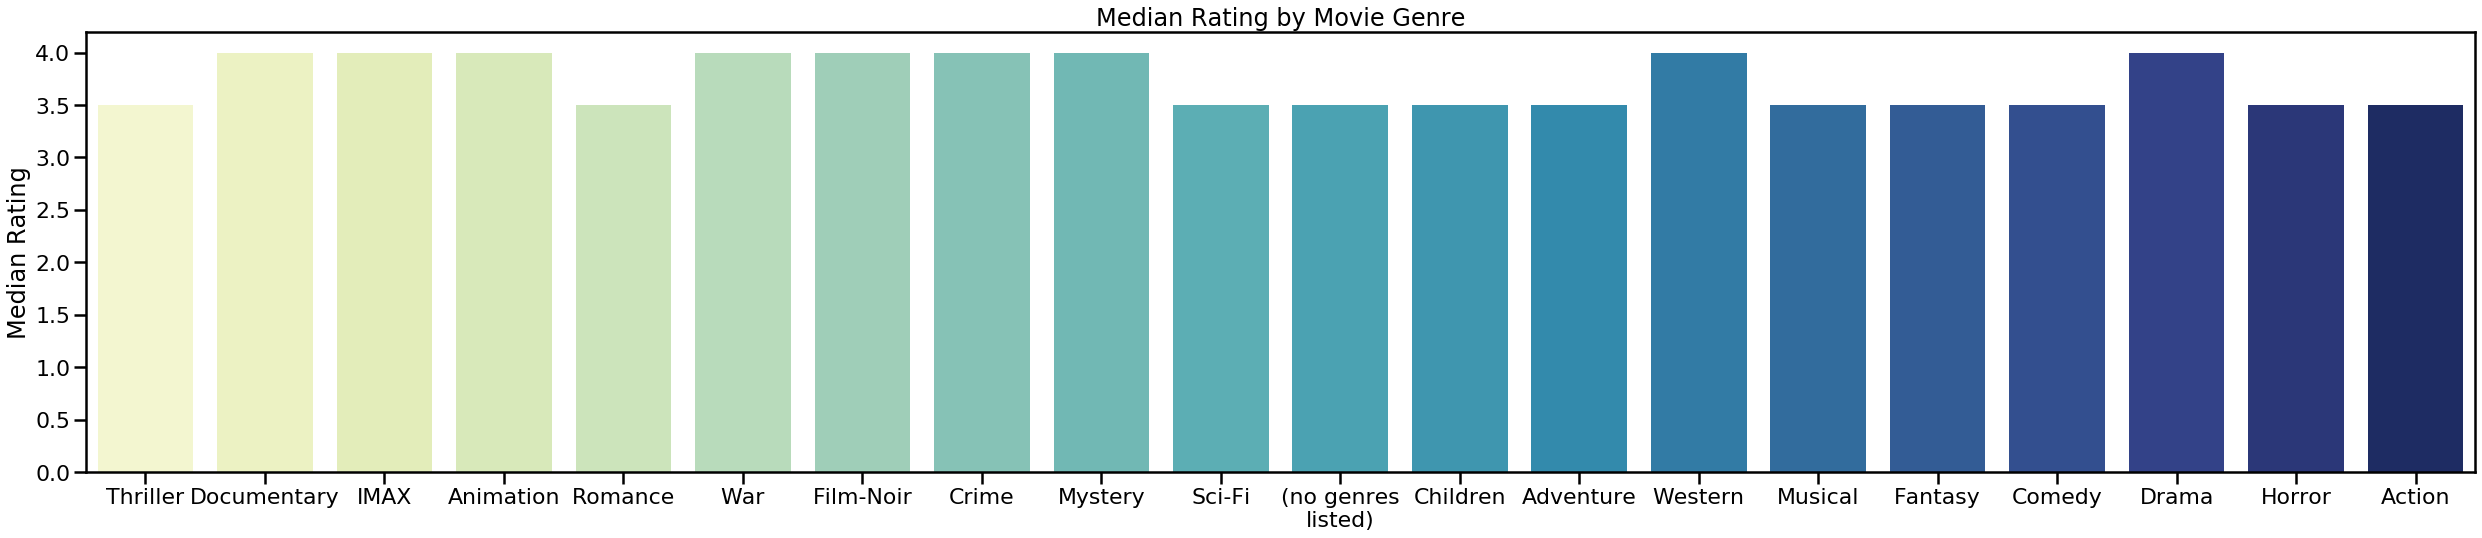

In [182]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 8)
rating_plot = sns.barplot(x = list(median_rating_genre.keys()), y = list(median_rating_genre.values()), palette = palette, ax=ax)
rating_plot.set_title("Median Rating by Movie Genre")
rating_plot.set_ylabel("Median Rating")
rating_plot.set_xticklabels([textwrap.fill(e, 11) for e in list(median_rating_genre.keys())])
plt.tight_layout()
plt.show()

There doesn't seem to be much variation in terms of the median rating per genre, with all genres having a median rating of around 3.5 - 4.

In [183]:
subdf = eda_df.groupby(["rating"]).sum()
subdf.drop(columns = ["userId", "movieId", "startYear", "runtimeMinutes"], inplace=True)

Exploring the breakdown of genres within different rating classes.

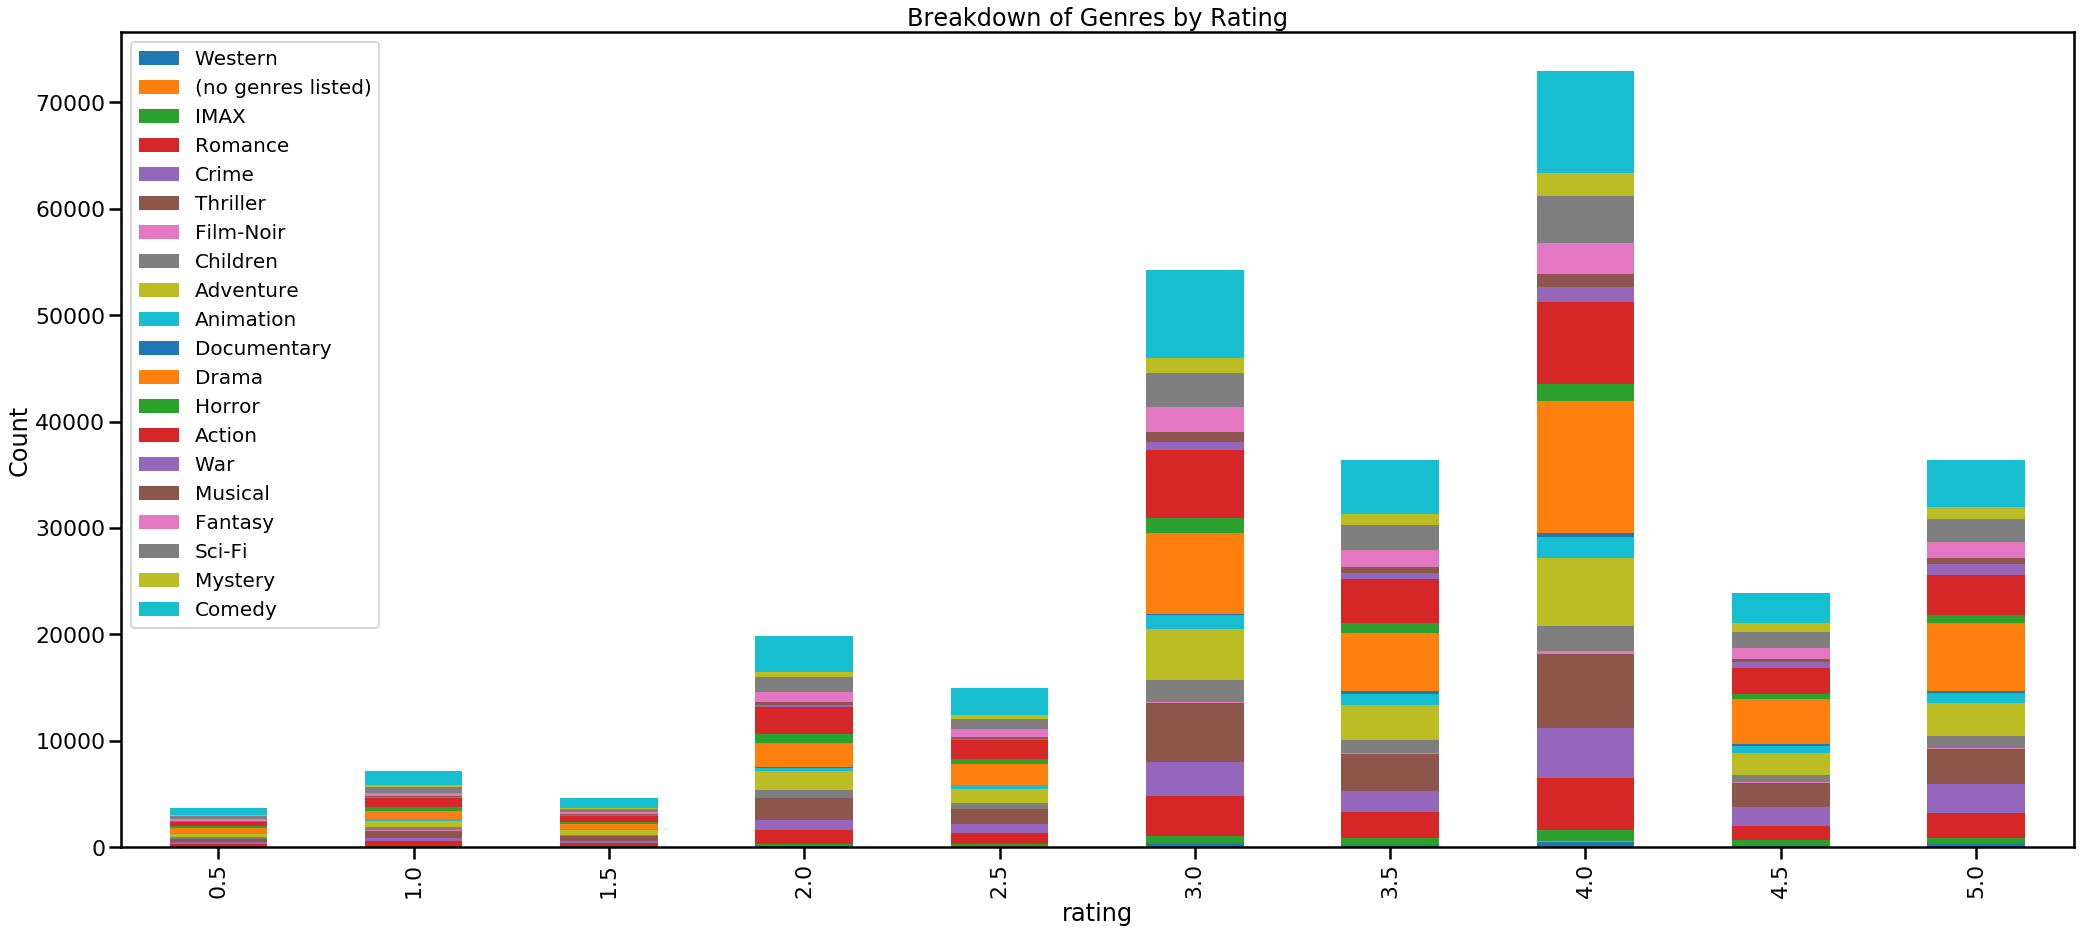

In [184]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 15)
subdf.plot.bar(stacked=True, ax=ax)
plt.legend(loc=2, prop={'size': 20})
plt.ylabel("Count")
plt.title("Breakdown of Genres by Rating")
plt.show()

Exploring if the runtime tends to be higher or lower for higher/lower rated movies.

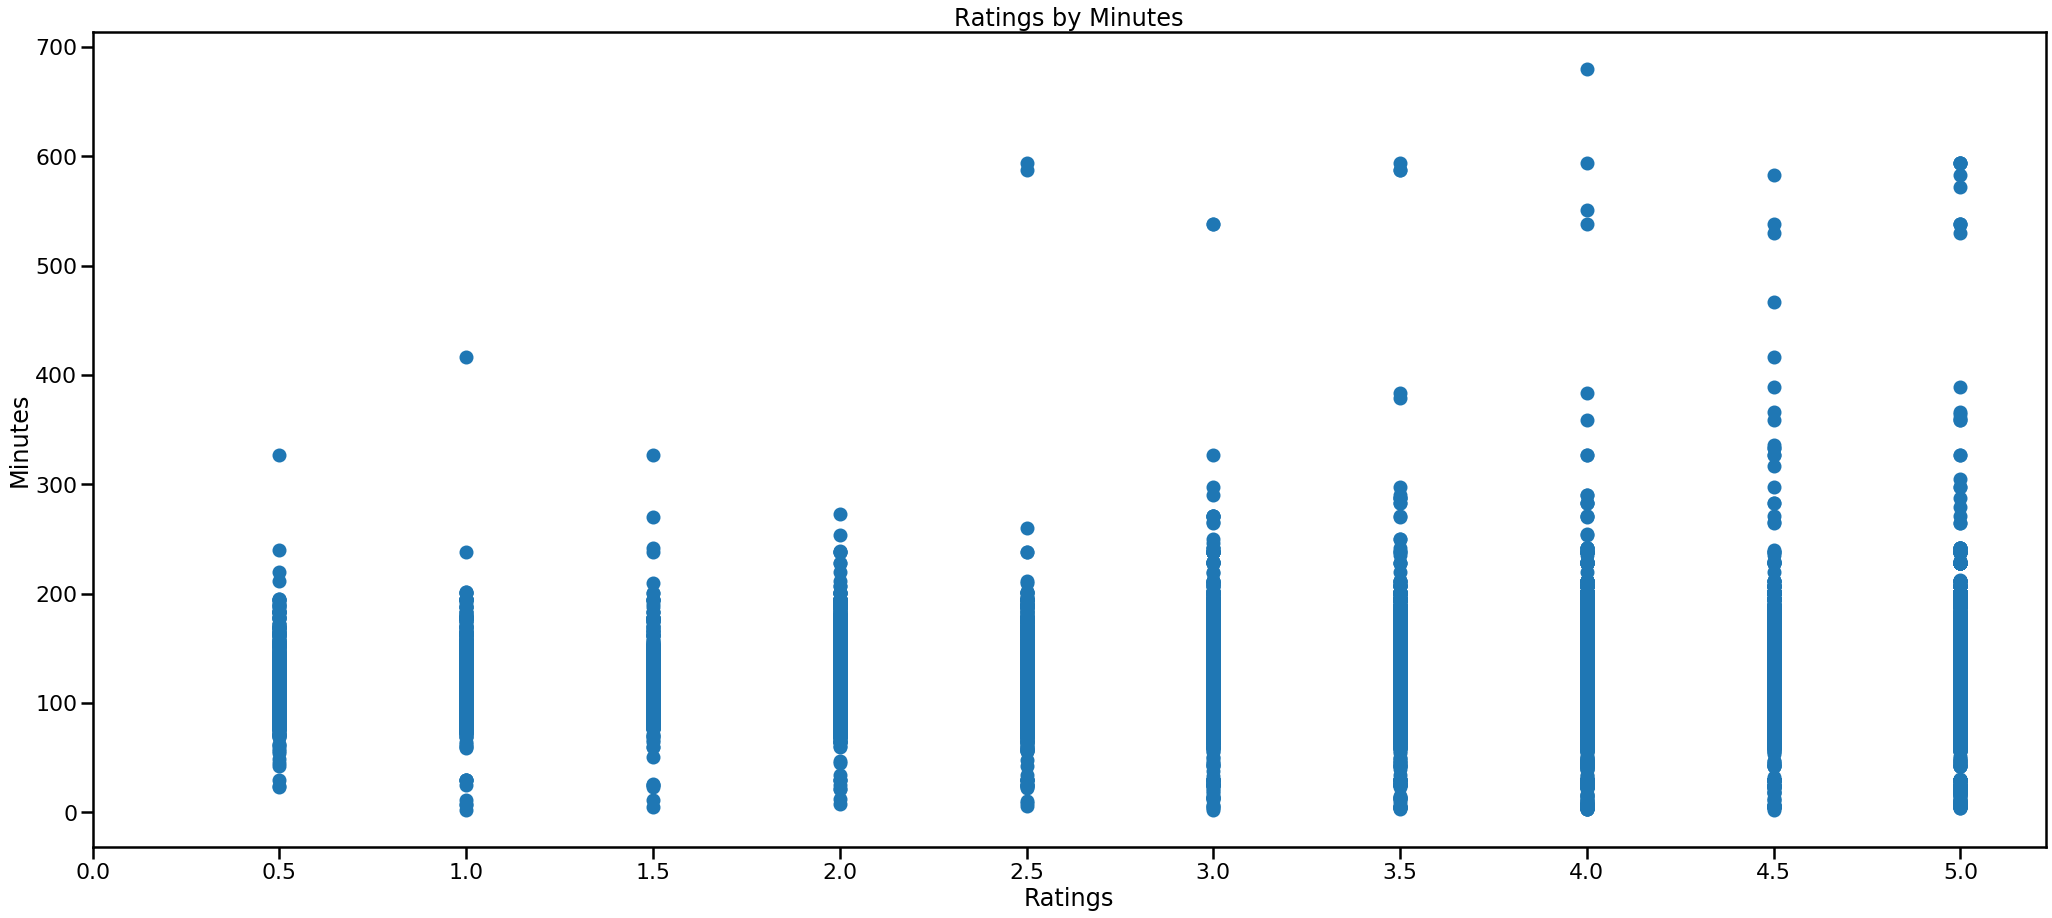

In [185]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 15)
plt.scatter(x=eda_df["rating"], y=eda_df["runtimeMinutes"])
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlabel("Ratings")
plt.ylabel("Minutes")
plt.title("Ratings by Minutes")
plt.show()

There does not appear to be any distinct trend for runtime across ratings.

We will also explore the distribution of the movie realease year in the dataset.

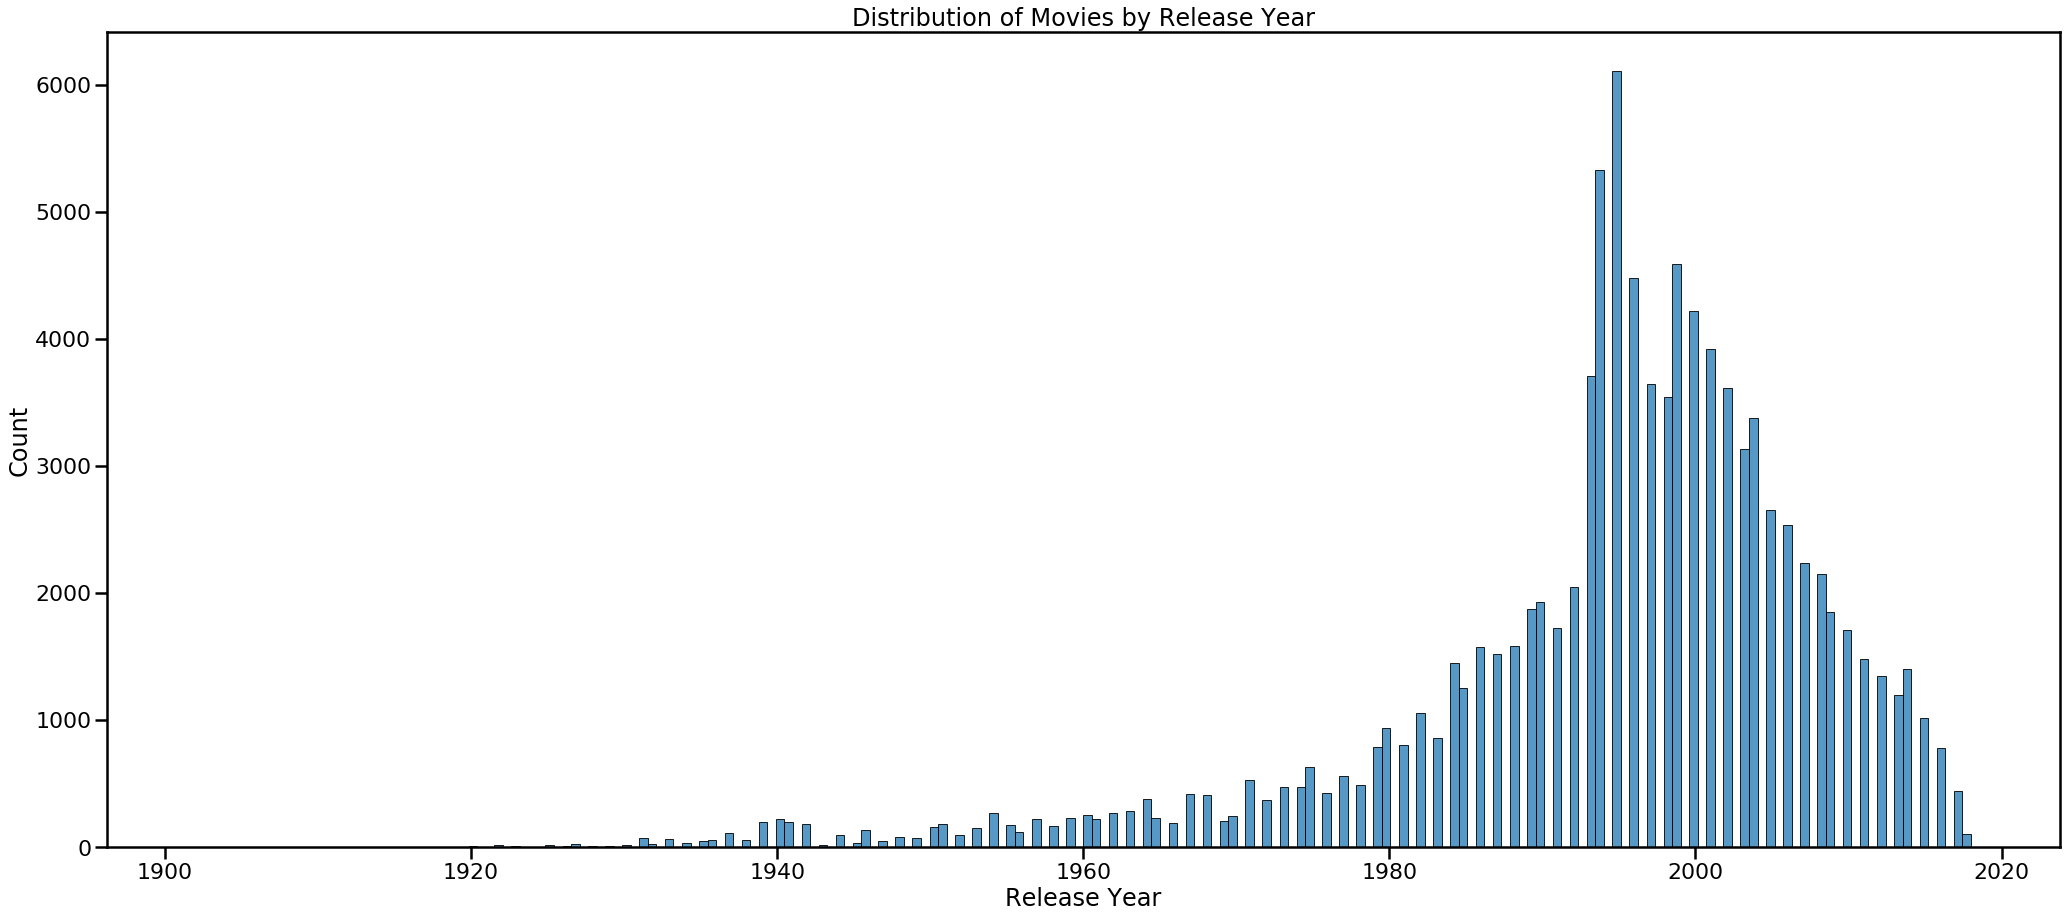

In [186]:
fig, ax = plt.subplots()
fig.set_size_inches(35, 15)
sns.histplot(eda_df["startYear"], ax=ax, palette = palette)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Movies by Release Year")
plt.show()

Most of the ratings appear to be from movies made in between 1990 and 2010.

In [187]:
top = list(pd.DataFrame(eda_df[eda_df["rating"] == 5].groupby("title").count()).sort_values(by="rating", ascending=False)[:20].index)

In [188]:
top

['Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Forrest Gump (1994)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Silence of the Lambs, The (1991)',
 "Schindler's List (1993)",
 'Godfather, The (1972)',
 'Fight Club (1999)',
 'Braveheart (1995)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Usual Suspects, The (1995)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'American Beauty (1999)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Terminator 2: Judgment Day (1991)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Saving Private Ryan (1998)',
 'Fargo (1996)',
 'Princess Bride, The (1987)']

In [189]:
low_count = eda_df.groupby("title").count().sort_values(by= "rating", ascending=False)
low_count[low_count["rating"] < 5].shape[0]

6054

Would potentially be beneficial to remove movies with low counts of ratings, but considering that it would remove many movies (over 6000 titles had less than 5 ratings), we will leave these movies in.

### Modeling

#### Modeling with Surprise Library

We will now begin the modeling process with the surprise library. We will start with a baseline memory-based model (KNN basic) and then implement and SVD model to be used in the recommendation system.

In [207]:
from surprise import Reader, Dataset
from surprise.prediction_algorithms import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy
from sklearn.model_selection import train_test_split as tts
from surprise.dataset import DatasetAutoFolds
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.model_selection import GridSearchCV

In [195]:
user_item = condensed[["userId", "movieId", "rating"]]

Here we will split our data into training and testing data

In [200]:
train, test = tts(user_item, test_size=0.2)

In [201]:
reader = Reader(rating_scale=(0.5, 5))
data_train = Dataset.load_from_df(train, reader)
data_test = Dataset.load_from_df(test, reader)

In [202]:
train_x = DatasetAutoFolds.build_full_trainset(data_train)

In [203]:
test_x = DatasetAutoFolds.build_full_trainset(data_test).build_testset()

We will then fit a basic model to get a baseline RMSE. The model we will use is KNN Basic

In [204]:
sim_cos = {'name':'cosine', 'user_based':True}

In [205]:
basic = KNNBasic(sim_options=sim_cos)
basic.fit(train_x)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [206]:
base_test_preds = basic.test(test_x)

In [208]:
accuracy.rmse(base_test_preds)

RMSE: 0.9762


0.976230246595484

RMSE for baseline model is 0.98, meaning that on average the model's predictions for user ratings are approximately 1 point off (on a scale of 0.5 - 5).

We will now fit an SVD model with default parameters.

In [209]:
svd_model = SVD()
svd_model.fit(train_x)

In [210]:
svd_test_preds = svd_model.test(test_x)

In [211]:
accuracy.rmse(svd_test_preds)

RMSE: 0.8779


0.877921080160476

The SVD model had a lower average error (0.88), showing a slight improvement over the baseline model. We will now try to tune the SVD model with gridsearch to identify the optimal parameters.

In [212]:
param_grid = {'n_factors':[20, 50, 100],'n_epochs': [10, 20], 'lr_all': [0.002, 0.005, 0.007],
               'reg_all': [0.02, 0.04, 0.08]}
gs_model = GridSearchCV(SVD ,param_grid=param_grid, n_jobs = -1, joblib_verbose=5)
gs_model.fit(data_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  7.3min finished


In [213]:
gs_model.best_params, gs_model.best_score

({'rmse': {'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.08},
  'mae': {'n_factors': 20, 'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.04}},
 {'rmse': 0.8719852234921641, 'mae': 0.6701856706886046})

In [214]:
grid_svd = SVD(n_factors=50, n_epochs=20, lr_all=0.007, reg_all=0.08)
grid_svd.fit(train_x)

In [215]:
gridsvd_test_preds = grid_svd.test(test_x)
accuracy.rmse(gridsvd_test_preds)

RMSE: 0.8689


0.8689193889346069

The grid search returned an svd model that is marginally better than the default (RMSE of 0.87). This is the model we will use for our recommendation function

In [224]:
def movie_recommender(movie_df, num, model, genre=None):
    uid = input("Enter UserID: ") #Enter UserID
    ratings_list = []
    while len(ratings_list) < num: # While loop to stop asking for ratings after num parameter is reached
        if genre: # If a certain genre is specified
            g = movie_df["genres"].map(lambda x: genre in x)
            df = movie_df.iloc[g[g].index, :] # Subset dataframe to ask for movie recommendations only from said genre
        else:
            df = movie_df 
        ratings_dict = {} # Create a dictionary to store movie and rating information
        movie = df.sample(1) # Generate random movie sample from dataframe
        movie_title = movie["title"].values[0] 
        print("\n" + str(movie_title)) # Print movie title for user to see
        q = input('How do you rate this movie on a scale of 0.5-5, press n if you have not seen:\n') # Have user input rating for movie
        if q == 'n': # Give users option to skip movies they haven't seen by pressing "n"
            continue
        elif float(q) > 5 or float(q) < 0.5: # Ask users to input a rating on the scale if they put in an erroneous rating
            print("Please enter rating on scale of 0.5 to 5")
            continue
        else:
            iid = movie["movieId"].values[0]
            ratings_dict["userId"] = uid # Store user ID in ratings dictionary
            ratings_dict["movieId"] = iid # Store movie ID in ratings dictionary
            ratings_dict["rating"] = q # Store rating in ratings dictionary
            ratings_list.append(ratings_dict) # Append dictionary entry for single movie to ratings list
    new_ratings_df = movie_df.append(ratings_list, ignore_index=True).drop(columns = ["timestamp", "title", "genres"]) # Append ratings to original dataframe to create new dataframe 
    new_data = Dataset.load_from_df(new_ratings_df, reader) 
    model.fit(new_data.build_full_trainset()) # Fit model to new dataset after putting it in surprise format
    lm = [] # Create a list to store recommendations
    if genre: # Subset dataframe if a certain genre is specified
        g = movie_df["genres"].map(lambda x: genre in x)
        df = movie_df.iloc[g[g].index, :]
    else:
        df = movie_df
    for i in df["movieId"].unique(): 
        lm.append((i, model.predict(ratings_dict["userId"], i)[3])) # Use model to make predictions of ratings for every movie and append ratings and movie ID to list
    top_five = sorted(lm, key = lambda x: x[1], reverse=True)[:5] # Sort list by ratings and choose the top 5
    for i, movie in enumerate(top_five):
        iid = movie[0] # Take movie ID from top five list
        t = df[df["movieId"] == iid].title.values[0] # Use Movie ID to set movie title as variable t
        print(f"\n Recomendation #{i+1}: {iid} {t}") # Print recommendation title

Testing of recommendation function

In [226]:
movie_recommender(movies_ratings, 5, grid_svd, "Comedy")

Enter UserID: 1000

Young Frankenstein (1974)
How do you rate this movie on a scale of 0.5-5, press n if you have not seen:
4

Princess Bride, The (1987)
How do you rate this movie on a scale of 0.5-5, press n if you have not seen:
4

Birdcage, The (1996)
How do you rate this movie on a scale of 0.5-5, press n if you have not seen:
n

Holes (2003)
How do you rate this movie on a scale of 0.5-5, press n if you have not seen:
5

Dead Men Don't Wear Plaid (1982)
How do you rate this movie on a scale of 0.5-5, press n if you have not seen:
n

Austin Powers in Goldmember (2002)
How do you rate this movie on a scale of 0.5-5, press n if you have not seen:
5

Fish Called Wanda, A (1988)
How do you rate this movie on a scale of 0.5-5, press n if you have not seen:
3

 Recomendation #1: 720 Wallace & Gromit: The Best of Aardman Animation (1996)

 Recomendation #2: 750 Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)

 Recomendation #3: 1136 Monty Python and the Holy G

#### Modeling with LightFM

##### Data Preparation and PCA

We will now create dummy variables for the genres and directors features of the original condensed dataframe so they can be run through the feature matrix in LightFM

In [165]:
preprocessed = condensed.copy()

In [166]:
preprocessed.drop(columns = "title", inplace=True)

In [190]:
preprocessed = create_dummy(preprocessed, "genresb", '|')

In [191]:
preprocessed = create_dummy(preprocessed, "directors", ',')

In [193]:
features = preprocessed.drop(columns = ["userId", "movieId", "rating", "runtime"])

KeyError: "['runtime'] not found in axis"

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
features_transformed = scaler.fit_transform(features)

In [ ]:
pca = PCA(n_components=21)
principalComponents = pca.fit_transform(features_transformed)

In [ ]:
pca.explained_variance_ratio_.sum()

In [ ]:
components_df = pd.DataFrame(principalComponents, columns = ["PC" + str(num) for num in range(1, 22)])

In [ ]:
from lightfm.data import Dataset
from lightfm import LightFM

In [ ]:
consolidated = pd.concat([user_item.reset_index(), components_df], axis=1)

In [ ]:
consolidated.head()

In [ ]:
item_df = consolidated.groupby("movieId").mean().drop(columns = ["index", "userId", "rating"], axis = 1).reset_index()

In [ ]:
def binning(df, features, bins):
    new_df = pd.DataFrame([])
    for feature in features:
        fdf = pd.cut(x = df[feature], bins=bins)
        new = pd.concat([new_df, fdf], axis=1)
        new_df = new
    return new_df

In [ ]:
binned_pc = binning(item_df, ["PC"+str(num) for num in range(1, 22)], 6)

In [ ]:
binned_items = pd.concat([item_df["movieId"], binned_pc], axis=1)

In [ ]:
features_df = pd.get_dummies(binned_items).set_index("movieId")

##### LightFM Modeling

In [ ]:
item_features=list(features_df.columns)
item_features

In [ ]:
data_fm = Dataset()
data_fm.fit(user_item.userId.unique(), user_item.movieId.unique(), item_features = item_features)

In [ ]:
interactions_matrix, weights_matrix = data_fm.build_interactions([tuple(i) for i in user_item.values])

print(repr(interactions_matrix))

In [ ]:
feature_dict = dict(list(features_df.groupby(features_df.index)))

In [ ]:
l = []
for k, v in feature_dict.items():
    check = v.columns[(v == 1).any()]
    if len(check) > 0:
        l.append((k, check.to_list()))

In [ ]:
features_tuples = l

In [ ]:
features_matrix = data_fm.build_item_features(features_tuples)

print(repr(features_matrix))

In [ ]:
model = LightFM(loss='warp')
model.fit(interactions_matrix, item_features=features_matrix)

In [ ]:
from lightfm.evaluation import auc_score

In [ ]:
score = auc_score(model, interactions_matrix, 
        item_features=features_matrix).mean()

In [ ]:
score

In [ ]:
model_base = LightFM(loss="warp")
model_base.fit(interactions_matrix)

In [ ]:
score_base = auc_score(model_base, interactions_matrix).mean()

In [ ]:
score_base